## HW 2 ##

# **Problem 1**

Implement a simulation of the Hadamard test for any qubit state |psi> and any single qubit unitary U using numpy. Observe that you have to compute how the state of the quantum register changes. It is not enough to just code up the formula for the probabilities that we derived in class.

Recall that you can realize the controlled-U gate as follows: |0><0| otimes I + |1><1| otimes U. Use the numpy command np.kron for the tensor product.

For |psi> use the state |0> and for the unitary U use the orthogonal matrix that describes the rotation by angle 2 pi theta, where theta [0, 1).

Create a plot showing the probability Pr(0) in dependence on theta.



## **Solution**

**Import required libraries and define primitives**

In [58]:
import numpy as np
import matplotlib.pyplot as plt


Ket0 = np.array([[1],[0]])
Ket0T= Ket0.transpose()
Ket1 = np.array([[0],[1]])
Ket1T= Ket1.transpose()
I = np.eye(2, dtype=int)


[[1]
 [0]]
[[1 0]]
[[0]
 [1]]
[[0 1]]
[[1 0]
 [0 1]]


Hadamard Test

In [0]:
t=0;
Tetha = np.zeros((100,1),dtype=float)
res = np.zeros((100,1),dtype=float)
T_H = (1/np.sqrt(2))*np.array([[1,0,1,0],[0,1,0,1],[1,0,-1,0],[0,1,0,-1]])
Input = np.array([[1],[0],[0],[0]])
count=0
while (t<1):
    U = [[np.cos(2*np.pi*t), (-1)*np.sin(2*np.pi*t)], [np.sin(2*np.pi*t), np.cos(2*np.pi*t)] ]
    Step1 = np.matmul(T_H,Input)
    Step2 = np.matmul((np.kron(np.matmul(Ket0,Ket0T),I)+np.kron(np.matmul(Ket1,Ket1T),U)),Step1)
    Step3 = np.matmul(T_H,Step2)
    Tetha[count] = t
    res[count] = (Step3[0]*Step3[0])+(Step3[1]*Step3[1])
    count=count+1
    t=t+0.01

Plot the Pr(|0>)




Text(0, 0.5, 'Pr(|0>)')

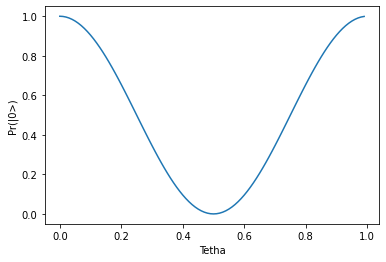

In [63]:
plt.plot(Tetha,res)
plt.xlabel("Tetha")
plt.ylabel("Pr(|0>)")

# **Problem 2**

Implement a simulation of the SWAP test.

Use |psi1> = |0> and |psi2> = cos(2 pi theta) |0> + sin(2 pi theta) |1>. Create a plot showing the probability Pr(0) in dependence on theta.

# **Solution**

In [0]:
import numpy as np
import matplotlib.pyplot as plt


Ket0 = np.array([[1],[0]])
I = np.eye(2, dtype=int)

Swap Test

In [0]:
t=0;
Tetha = np.zeros((100,1),dtype=float)
res = np.zeros((100,1),dtype=float)

PM_H3 =(1/np.sqrt(2))*np.array([
            [1,0,0,0,1,0,0,0],
            [0,1,0,0,0,1,0,0],
            [0,0,1,0,0,0,1,0],
            [0,0,0,1,0,0,0,1],
            [1,0,0,0,-1,0,0,0],
            [0,1,0,0,0,-1,0,0],
            [0,0,1,0,0,0,-1,0],
            [0,0,0,1,0,0,0,-1]
            ])

PM_CS = np.array([
    [1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0],
    [0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,1,0],
    [0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1]
    ])
Input0 =  np.kron(Ket0,Ket0);
count=0
while (t<1):
    psi2 = np.array([[np.cos(2*np.pi*t)], [np.sin(2*np.pi*t)]])
    Input = np.kron(Input0, psi2)
    Step1 = np.matmul(PM_H3,Input)
    Step2 = np.matmul(PM_CS,Step1)
    Step3 = np.matmul(PM_H3,Step2)
    Tetha[count] = t
    res[count] = (Step3[0]*Step3[0])+(Step3[1]*Step3[1])+(Step3[2]*Step3[2])+(Step3[3]*Step3[3])
    count=count+1
    t=t+0.01

Plot Pr(|0>)

Text(0, 0.5, 'Pr(|0>)')

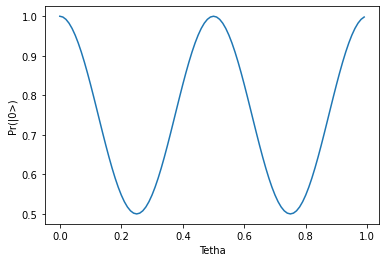

In [72]:
plt.plot(Tetha,res)
plt.xlabel("Tetha")
plt.ylabel("Pr(|0>)")